In [1]:
#import libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, Sequential

In [2]:
!pip install --upgrade tensorflow


In [3]:
from google.colab import drive
from pathlib import Path

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define paths to the Train and Test directories
data_dir_train = Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test  = Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")


In [5]:
# List the contents of the Train directory
print("Train Directory Contents:")
!ls "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# List the contents of the Test directory
print("\nTest Directory Contents:")
!ls "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"


Train Directory Contents:
'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'

Test Directory Contents:
'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'


In [6]:
# Count train images
image_count_train = len(list(data_dir_train.glob('*/*.[jp][pn]g')))
print(f'Train Image count: {image_count_train}')

# Count test images
image_count_test = len(list(data_dir_test.glob('*/*.[jp][pn]g')))
print(f'Test Image count: {image_count_test}')


Train Image count: 2239
Test Image count: 118


In [7]:
# Define some parameters for the loader:

batch_size = 32
img_height = 180
img_width = 180

In [8]:
# Use 80% of the images for training, and 20% for validation.

#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
#All the classes of skin cancer.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


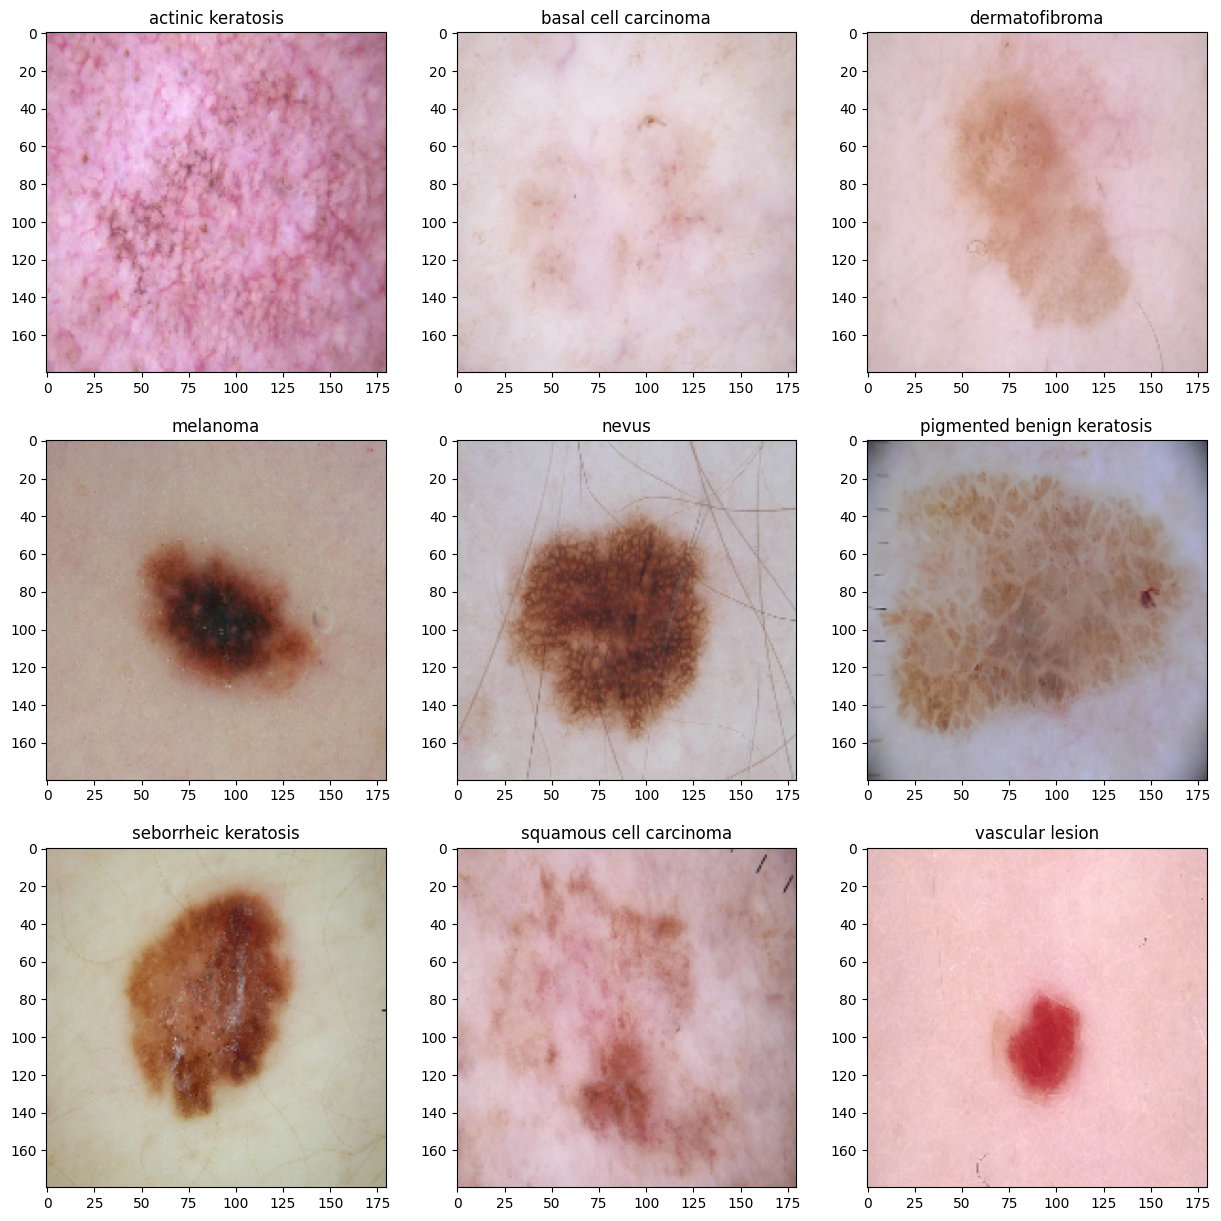

In [11]:
# Visualize the data
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [12]:
# The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

# Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

# Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Model Creation
input_shape = (img_height,img_width,3)

model = Sequential()    #Sequential allows you to create models layer-by-layer

#First Convulation Layer
# Use tf.keras.layers.experimental.preprocessing instead of layers.experimental.preprocessing
# The experimental preprocessing layers were moved to tf.keras.layers.experimental.preprocessing in TensorFlow 2.6+
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))  # Changed to tf.keras.layers.preprocessing.Rescaling
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Define the input shape
input_shape = (img_height, img_width, 3)

# Create the Sequential model
model = Sequential()

# Use an Input layer to define the input shape
model.add(tf.keras.layers.Input(shape=input_shape))

# First Convolution Layer
model.add(tf.keras.layers.Rescaling(1./255))  # Scaling the input values
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Third Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten the output before the Dense layers
model.add(layers.Flatten())

# Fully connected Dense Layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(len(class_names), activation='softmax'))

# # Print the model summary
# model.summary()


In [16]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [17]:

# summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping: Stop training when the validation loss stops improving
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_ds,  # Your training dataset, already includes features and labels
    validation_data=val_ds,  # Your validation dataset, already includes features and labels
    epochs=15,  # Start with 20 epochs
    # callbacks=[early_stopping]  # Apply early stopping to avoid overfitting
)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.2072 - loss: 2.3121 - val_accuracy: 0.2528 - val_loss: 1.8988
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3459 - loss: 1.8295 - val_accuracy: 0.3199 - val_loss: 1.8091
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3574 - loss: 1.7718 - val_accuracy: 0.5056 - val_loss: 1.4990
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4607 - loss: 1.5453 - val_accuracy: 0.4653 - val_loss: 1.5583
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4869 - loss: 1.4732 - val_accuracy: 0.5347 - val_loss: 1.4035
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5481 - loss: 1.2857 - val_accuracy: 0.4877 - val_loss: 1.4672
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5452 - loss: 1.2796 - val_accuracy: 0.5280 - val_loss: 1.4392
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5746 - loss: 1.1942 - val_accuracy: 0.5034 - v

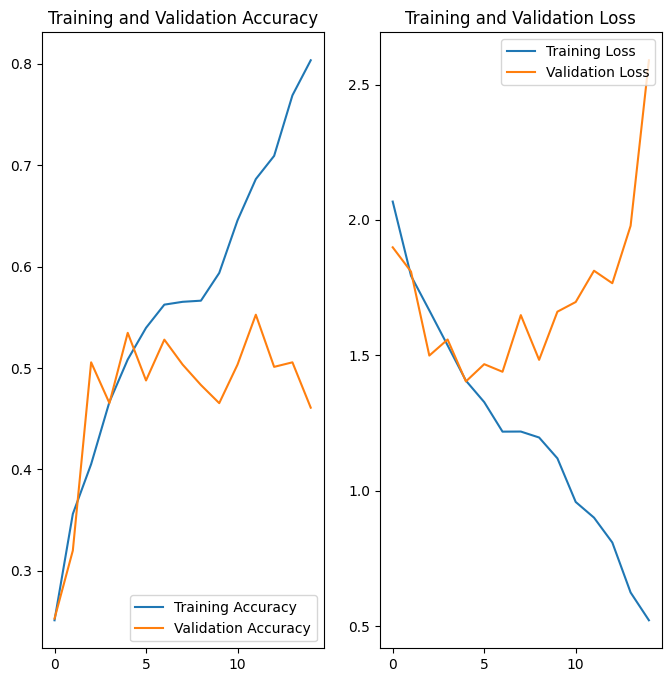

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#  Define the number of epochs used during training
epochs = 15  # Replace 15 with the actual number of epochs you used
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

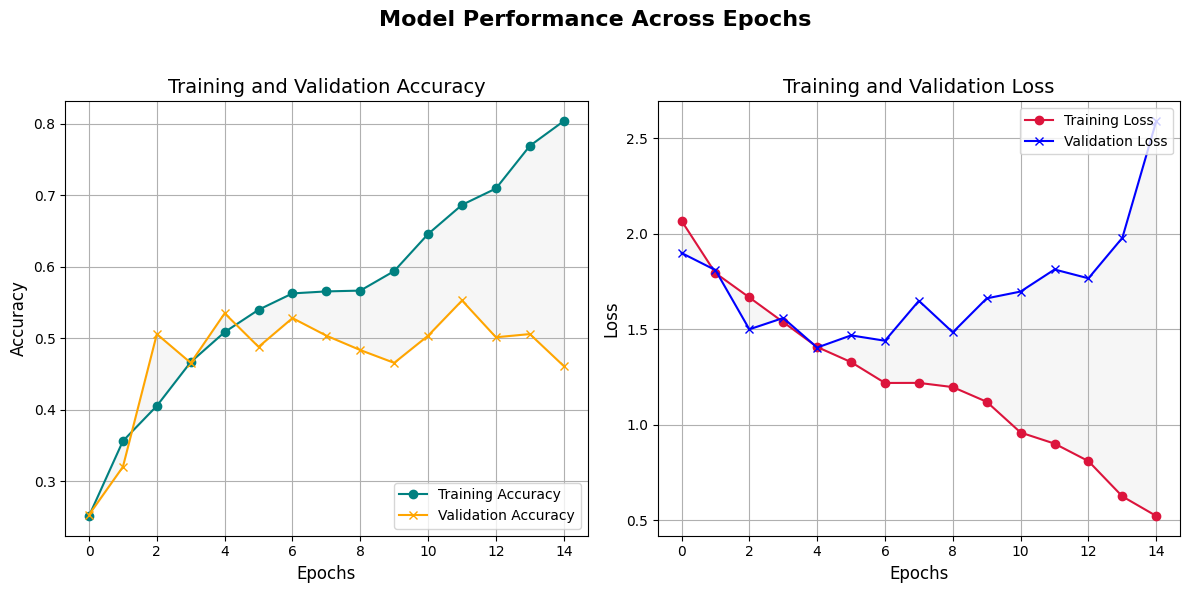

In [20]:
# Get training and validation accuracy/loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs dynamically based on the history object
epochs = len(history.history['accuracy'])
epochs_range = range(epochs)

# Customize the figure and subplots
plt.figure(figsize=(12, 6))  # Adjusted size for better visualization

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs_range, acc, label='Training Accuracy', color='teal', linestyle='-', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange', linestyle='-', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='lightgray', alpha=0.2)  # Filling between curves for aesthetics
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)  # Add grid lines for clarity

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs_range, loss, label='Training Loss', color='crimson', linestyle='-', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='blue', linestyle='-', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='lightgray', alpha=0.2)  # Filling between curves
plt.legend(loc='upper right')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)

# Display the plots
plt.suptitle('Model Performance Across Epochs', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing for the title
plt.show()


In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8023 - loss: 0.5165 - val_accuracy: 0.5324 - val_loss: 2.5317
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8464 - loss: 0.4244 - val_accuracy: 0.5347 - val_loss: 2.4407
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8630 - loss: 0.3820 - val_accuracy: 0.5034 - val_loss: 2.7466
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8950 - loss: 0.2868 - val_accuracy: 0.5615 - val_loss: 2.5805
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9038 - loss: 0.2243 - val_accuracy: 0.5347 - val_loss: 2.7629
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9275 - loss: 0.1805 - val_accuracy: 0.4564 - val_loss: 3.2056
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8922 - loss: 0.2379 - val_accuracy: 0.5280 - val_loss: 2.8396
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9366 - loss: 0.1313 - val_accuracy: 0.5056 - v

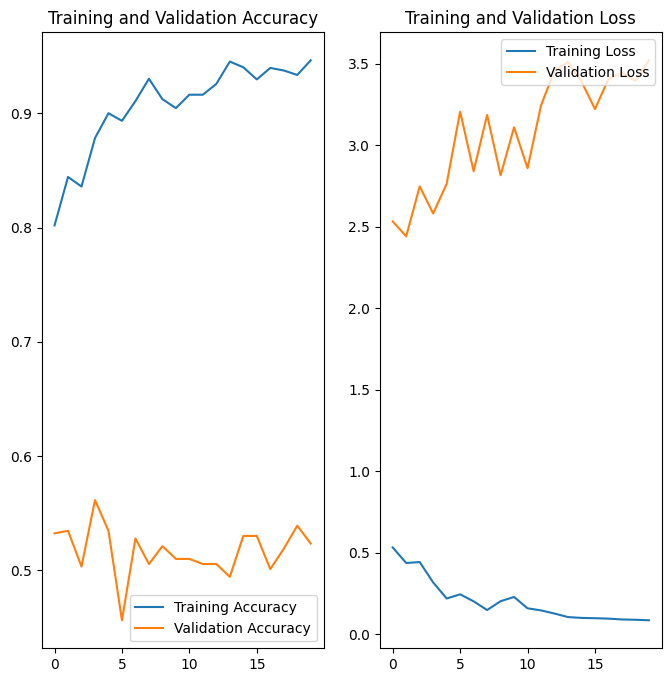

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#  Define the number of epochs used during training
epochs = 20 # Replace 15 with the actual number of epochs you used
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

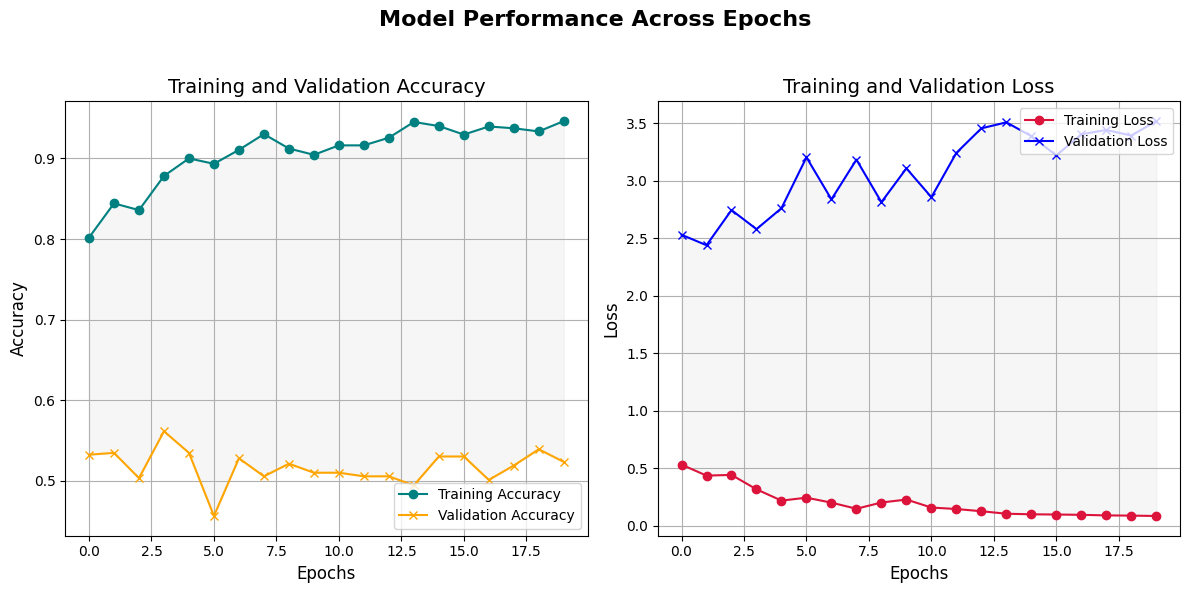

In [23]:

# Get training and validation accuracy/loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs dynamically based on the history object
epochs = len(history.history['accuracy'])
epochs_range = range(epochs)

# Customize the figure and subplots
plt.figure(figsize=(12, 6))  # Adjusted size for better visualization

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs_range, acc, label='Training Accuracy', color='teal', linestyle='-', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange', linestyle='-', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='lightgray', alpha=0.2)  # Filling between curves for aesthetics
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)  # Add grid lines for clarity

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs_range, loss, label='Training Loss', color='crimson', linestyle='-', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='blue', linestyle='-', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='lightgray', alpha=0.2)  # Filling between curves
plt.legend(loc='upper right')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)

# Display the plots
plt.suptitle('Model Performance Across Epochs', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing for the title
plt.show()


In [42]:
import tensorflow as tf

# Data augmentation strategy.

rescale = tf.keras.Sequential([
    # To rescale an input in the [0, 255] range to be in the [0, 1] range
    tf.keras.layers.Rescaling(1. / 255)  # Use tf.keras.layers.Rescaling directly
])

data_augmentation = tf.keras.Sequential([
    # Randomly flip each image horizontally and vertically.
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Use tf.keras.layers.RandomFlip directly

    # Randomly rotate each image.
    tf.keras.layers.RandomRotation(0.2),  # Use tf.keras.layers.RandomRotation directly

    # Randomly zoom each image during training.
    tf.keras.layers.RandomZoom(0.2),  # Use tf.keras.layers.RandomZoom directly

    # Randomly translate each image during training.
    tf.keras.layers.RandomTranslation(0.1, 0.1)  # Use tf.keras.layers.RandomTranslation directly
])

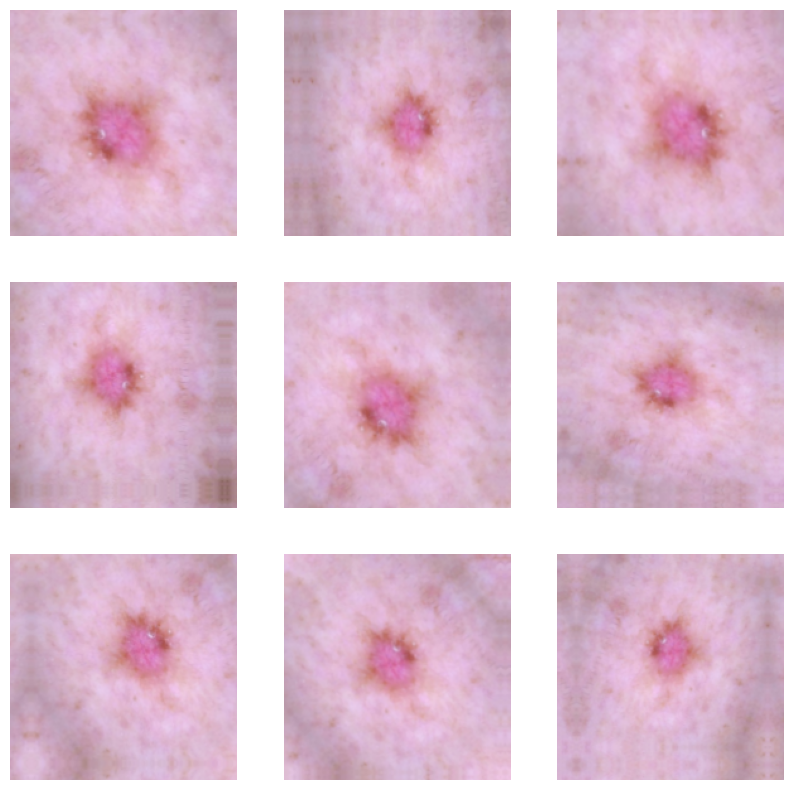

In [43]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [44]:
## Model 2 Creation

#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.


## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [45]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [46]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 265ms/step - accuracy: 0.1372 - loss: 2.8510 - val_accuracy: 0.1440 - val_loss: 2.1773
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 245ms/step - accuracy: 0.1456 - loss: 2.1788 - val_accuracy: 0.1403 - val_loss: 2.1873
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 85s 262ms/step - accuracy: 0.1405 - loss: 2.1794 - val_accuracy: 0.1403 - val_loss: 2.1875
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 246ms/step - accuracy: 0.1450 - loss: 2.1800 - val_accuracy: 0.1403 - val_loss: 2.1875
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 250ms/step - accuracy: 0.1430 - loss: 2.1796 - val_accuracy: 0.1418 - val_loss: 2.1861
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 235ms/step - accuracy: 0.1541 - loss: 2.1701 - val_accuracy: 0.1403 - val_loss: 2.1884
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.1325 - loss: 2.1797 - val_accuracy: 0.1403 - val_loss: 2.1876
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 81s 261ms/step - accuracy: 0.1368 - loss: 2

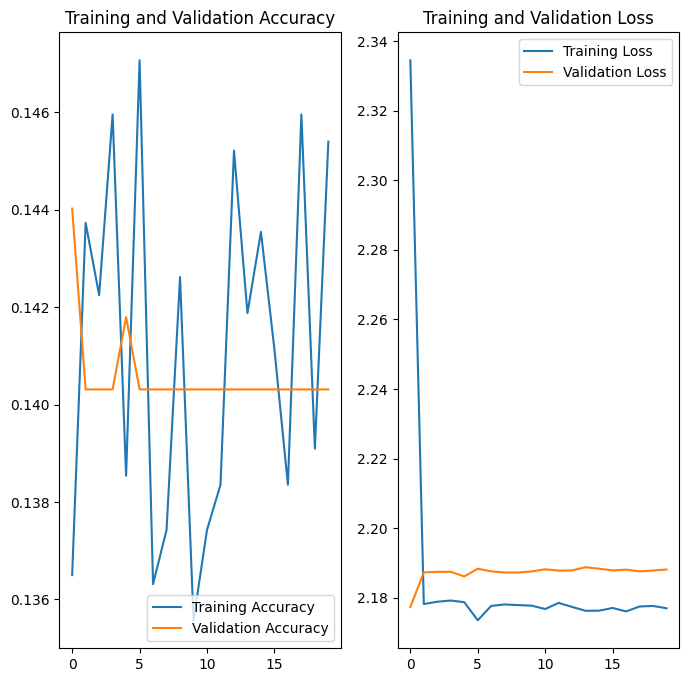

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Class Imbalance

In [48]:
# Class imbalance detection
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,seborrheic keratosis,77
1,pigmented benign keratosis,462
2,actinic keratosis,114
3,dermatofibroma,95
4,melanoma,438
5,squamous cell carcinoma,181
6,basal cell carcinoma,376
7,nevus,357
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

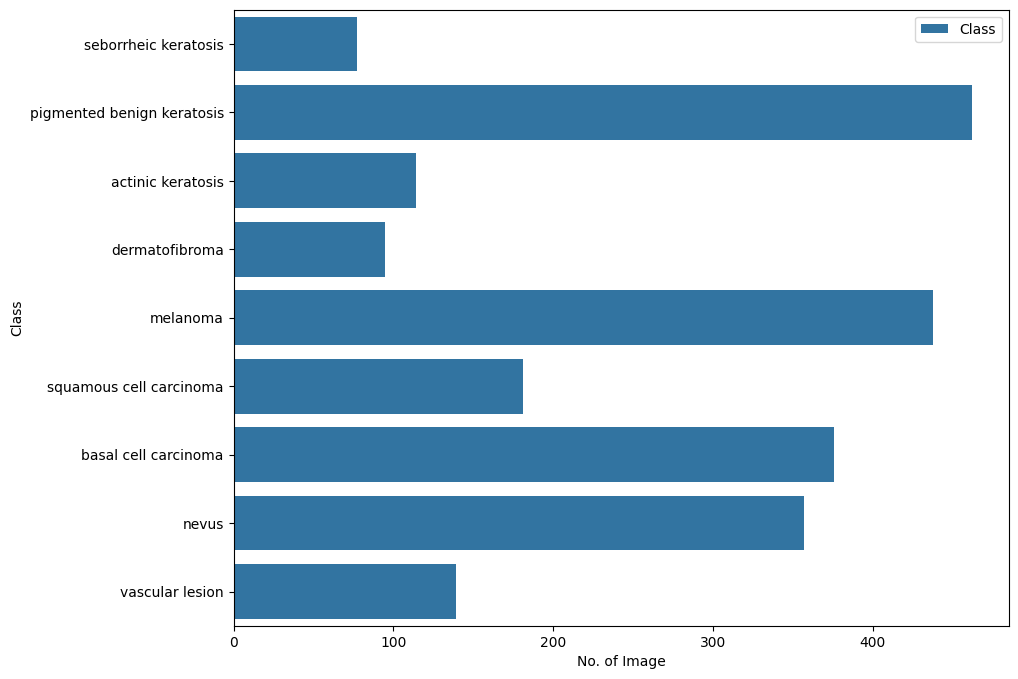

In [49]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")



# seborrheic keratosis has the least number of samples only 77.

# pigmented benign keratosis (462 Samples), melanoma (438 Samples), basal cell carcinoma (376 Samples), and nevus (357 Samples) classes dominates the data in terms proportionate number of samples .

In [26]:
!pip install Augmentor

In [50]:
path_to_training_dataset="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset + i)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
#     # /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/


for i in class_names:
    # Construct the full path to the class subfolder
    class_path = os.path.join(path_to_training_dataset, i)

    # Check if the directory exists before creating the pipeline
    if os.path.exists(class_path):
        p = Augmentor.Pipeline(class_path)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)  # Adding 500 samples per class
    else:
        print(f"Warning: Class directory not found: {class_path}")

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D4D8D123B80>: 100%|██████████| 500/500 [00:20<00:00, 24.33 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D4D8D123B20>: 100%|██████████| 500/500 [00:21<00:00, 23.33 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D4D8D107130>: 100%|██████████| 500/500 [00:19<00:00, 26.08 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D4D8D3A9540>: 100%|██████████| 500/500 [01:33<00:00,  5.34 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=960x645 at 0x7D4D8D1777F0>: 100%|██████████| 500/500 [01:10<00:00,  7.07 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D4DE95C9EA0>: 100%|██████████| 500/500 [00:19<00:00, 25.27 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D4D63485690>: 100%|██████████| 500/500 [00:43<00:00, 11.49 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D4D9A5F1780>: 100%|██████████| 500/500 [00:19<00:00, 25.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D4DE95A9690>: 100%|██████████| 500/500 [00:19<00:00, 25.84 Samples/s]


In [54]:
#Count total number of image generated by Augmentor.
data_dir_train_path = pathlib.Path(data_dir_train) # Convert the string path to a pathlib.Path object
image_count_train = len(list(data_dir_train_path.glob('*/output/*.jpg'))) # Use the Path object for glob
print(image_count_train)

9000


see the distribution of augmented data after adding new images to the original training data.

In [55]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [56]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [57]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [58]:
#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [59]:
#label count.
df2['Label'].value_counts()

,count
Label,
seborrheic keratosis,1000
pigmented benign keratosis,1000
actinic keratosis,1000
dermatofibroma,1000
melanoma,1000
squamous cell carcinoma,1000
basal cell carcinoma,1000
nevus,1000
vascular lesion,1000


Train the model on the data created using Augmentor

In [60]:
batch_size = 32
img_height = 180
img_width = 180

In [61]:
data_dir_train="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [62]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [63]:
#Model

model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

In [64]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [65]:
epochs = 50
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 75s 234ms/step - accuracy: 0.1519 - loss: 2.5813 - val_accuracy: 0.1495 - val_loss: 4.0581
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 73s 227ms/step - accuracy: 0.3065 - loss: 1.8335 - val_accuracy: 0.2768 - val_loss: 1.9730
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 62s 220ms/step - accuracy: 0.4073 - loss: 1.5466 - val_accuracy: 0.3952 - val_loss: 1.5108
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 63s 223ms/step - accuracy: 0.4610 - loss: 1.3960 - val_accuracy: 0.4344 - val_loss: 1.4081
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 89s 249ms/step - accuracy: 0.4929 - loss: 1.3152 - val_accuracy: 0.4085 - val_loss: 1.4702
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 81s 248ms/step - accuracy: 0.5361 - loss: 1.2418 - val_accuracy: 0.5162 - val_loss: 1.1741
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 77s 229ms/step - accuracy: 0.5906 - loss: 1.0959 - val_accuracy: 0.6101 - val_loss: 1.0292
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 72s 255ms/step - accuracy: 0.6260 - loss: 1

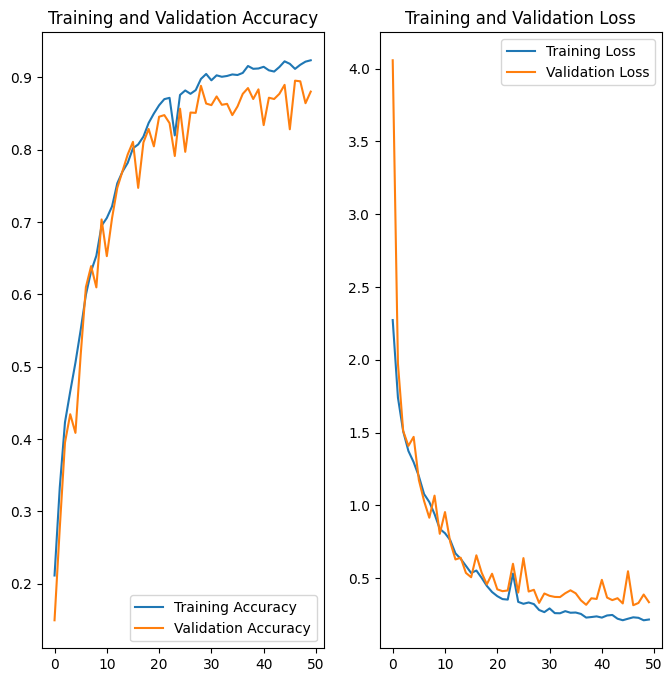

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

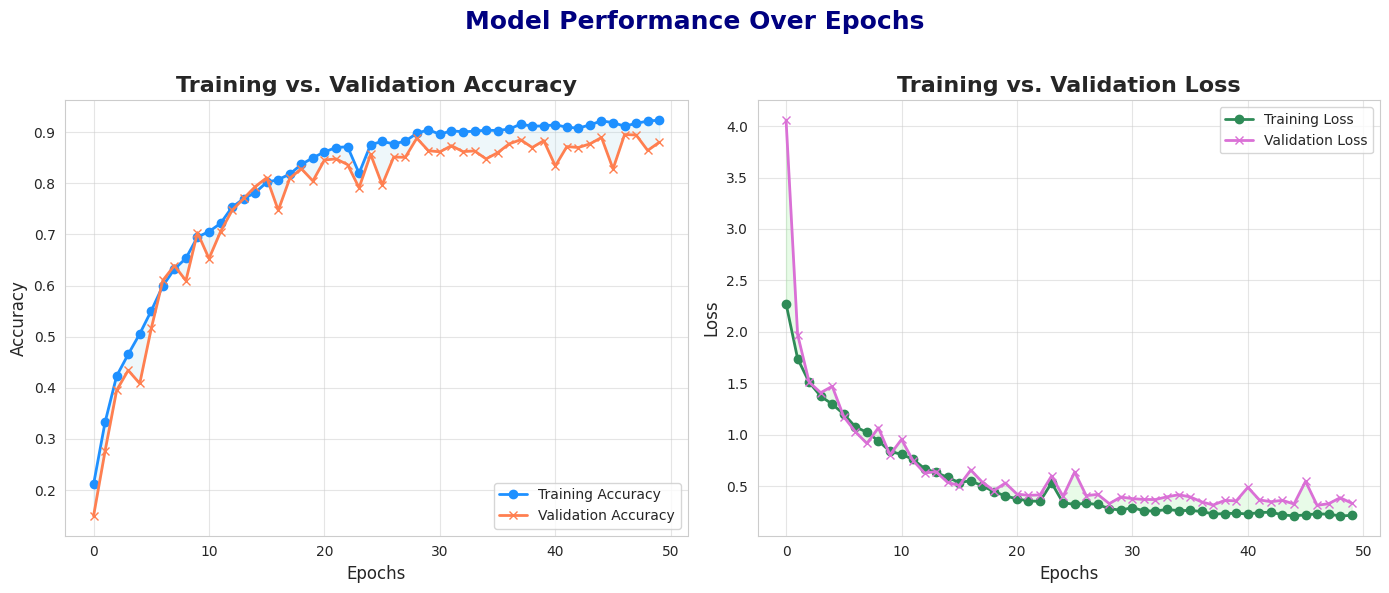

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Styling with Seaborn for a modern look
sns.set_style("whitegrid")  # Use a white grid background
sns.set_palette("Set2")  # Choose a vibrant color palette

# Extracting accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs = len(acc)
epochs_range = range(epochs)

# Create the figure and subplots with customized size and layout
plt.figure(figsize=(14, 6))  # Wider aspect for better side-by-side display

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(epochs_range, acc, label='Training Accuracy', color='dodgerblue', marker='o', markersize=6, linewidth=2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='coral', marker='x', markersize=6, linewidth=2)
plt.fill_between(epochs_range, acc, val_acc, color='lightblue', alpha=0.2)  # Shaded area between curves
plt.title('Training vs. Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.5)  # Light gridlines for clarity

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(epochs_range, loss, label='Training Loss', color='seagreen', marker='o', markersize=6, linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orchid', marker='x', markersize=6, linewidth=2)
plt.fill_between(epochs_range, loss, val_loss, color='lightgreen', alpha=0.2)  # Shaded area between curves
plt.title('Training vs. Validation Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(alpha=0.5)

# Add a super title for the whole figure
plt.suptitle('Model Performance Over Epochs', fontsize=18, fontweight='bold', color='navy')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the super title
plt.show()
